In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from eval import *
import pandas as pd
import numpy as np

In [3]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    shared_min = min(len(fake), len(real))
    real = real.sample(shared_min)
    fake = fake.sample(shared_min)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on real.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

# Creditcard

## Original TGAN

In [4]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan.csv', real_sep=',')
tgan_org_evaluator = DataEvaluator(real, fake)

In [5]:
tgan_org_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: kendalltau

Regressor MSE-scores:
                                           real        fake
real_data_RandomForestRegressor_F1   7,054.3047 54,649.5833
real_data_Lasso_F1                   6,854.3963 47,327.3389
real_data_Ridge_F1                   6,991.1339 49,722.8502
real_data_ElasticNet_F1              9,458.1600 22,711.8611
fake_data_RandomForestRegressor_F1 105,493.4703 58,602.2647
fake_data_Lasso_F1                 107,361.3170 88,418.3539
fake_data_Ridge_F1                 107,286.1360 88,281.1220
fake_data_ElasticNet_F1            113,571.6756 98,224.3464

Results:
Number of duplicate rows is ignored for total score.
                                                 Result
basic statistics                                 0.7392
Correlation column correlations                  0.0517
Mean Correlation between fake and real columns   0.9279
Mean correlation classifier F1                   0.7857
Correlation 5 PCA components                     1.0000
Duplic

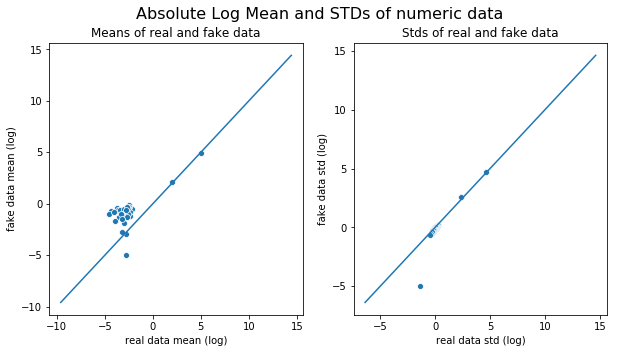

ValueError: max() arg is an empty sequence

In [6]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [ ]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan-wgan-gp.csv', real_sep=',')
wgan_evaluator = DataEvaluator(real, fake)

In [ ]:
wgan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)

In [ ]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [ ]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan-skip-connections.csv', real_sep=',')
skip_evaluator = DataEvaluator(real, fake)

In [ ]:
skip_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)

In [ ]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [ ]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/sample_creditcard_medgan_100.csv', real_sep=',')
medgan_evaluator = DataEvaluator(real, fake)

In [ ]:
medgan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)

In [ ]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [ ]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/sample_creditcard_tablegan_100.csv', real_sep=',')
tablegan_evaluator = DataEvaluator(real, fake)

In [ ]:
tablegan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)

In [ ]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [24]:
target_col = 'trans_type'
x = numerical_encoding(fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

[3.15558081e-03 2.25478515e-03 1.00895154e-02 1.60792182e-03 3.68700434e-03 0.00000000e+00 4.03186594e-05 0.00000000e+00 0.00000000e+00 3.42898353e-05 2.31575622e-04 0.00000000e+00 6.94454588e-04 2.26483782e-02
 1.71159461e-03 2.68261433e-03 5.46665979e-01 2.46056113e-03 4.02035426e-01]
Index(['trans_id', 'account_id', 'trans_amount', 'balance_after_trans',
       'trans_operation_CC_WITHDRAWAL',
       'trans_operation_COLLECTION_FROM_OTHER_BANK',
       'trans_operation_CREDIT_IN_CASH',
       'trans_operation_REMITTANCE_TO_OTHER_BANK', 'trans_operation_UNKNOWN',
       'trans_operation_WITHDRAWAL_IN_CASH', 'trans_k_symbol_HOUSEHOLD',
       'trans_k_symbol_INSURANCE_PAYMENT', 'trans_k_symbol_INTEREST_CREDITED',
       'trans_k_symbol_LOAN_PAYMENT', 'trans_k_symbol_OLD_AGE_PENSION',
       'trans_k_symbol_PAYMENT_FOR_STATEMENT',
       'trans_k_symbol_SANCTION_INTEREST', 'trans_k_symbol_UNKNOWN',
       'trans_date'],
      dtype='object')
[ 5  7  8 11  9  6 10 12  3 14  1 17 15  0  

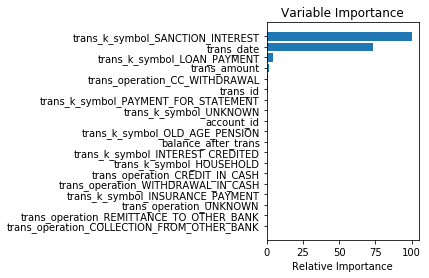

In [26]:
feature_importance = tgan_org_evaluator.f_classifiers[2].feature_importances_
print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
print(column_names)
print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

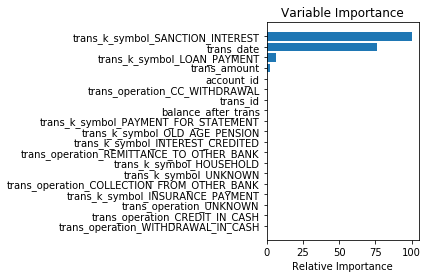

In [27]:
feature_importance = tgan_org_evaluator.r_classifiers[2].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()